Now that we have tried some basic **classification** and **regression** algorithms, more complicated algorithms will follow a familiar pattern: given a set of inputs and outputs, can I develop a model that relates the inputs to the outputs, and can I use that model to predict new outputs from a set of new inputs?

In this sense, you could quite easily treat these new regression and classification techniques as black boxes, feed data in and get data out. But don't do that. For a number of reasons. First, that's boring, right? And second, if you don't understand the inner workings of each classifier and regressor, you won't know how to properly tune them (a part of model selection). Here's one example from `scikit-learn` comparing a wide variety of classification techniques:

<img alt="sklearn_classification.png" src="https://github.com/UWDIRECT/UWDIRECT.github.io/blob/master/Wi19_content/DSMCER/images/sklearn_classification.png?raw=true">

In this replacement for a lecture, we're going to introduce you to a new set of classifiers and regressors known as **support vector machines** or **SVMs**. This is one of those cool techniques that can be used in a classification and regression setting. But for the purposes of this module, we're going to only look at the classification setting.

OK, let's get some data. For the purposes of this notebook, we're going to create a linearly separable dataset really quick using some `scikit-learn magic`:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from matplotlib.colors import ListedColormap

In [29]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1, class_sep=0.7)
rng = np.random.RandomState(2)
#X += 2 * rng.uniform(size=X.shape)
data = (X, y)

Let's do a training-test split:

In [30]:
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

Let's plot the data to see what we have.

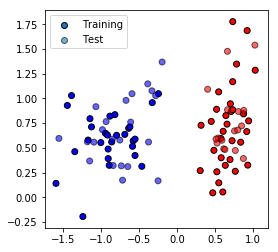

In [31]:
figure, ax = plt.subplots(figsize=(4,4))

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k', label='Training')
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
           edgecolors='k', label='Test')
#ax.set_xlim([-3,4])
#ax.set_ylim([0,4])
ax.legend()

Remember how our KNN classifier worked? It was able to predict the class based on the surrounding K nearest neighbors. An SVM works on a different paradigm. In this case, we're going to try to draw a line that splits the two groups. Let's try applying a simple SVM algorithm to do this for us:

In [11]:
from sklearn.svm import SVC

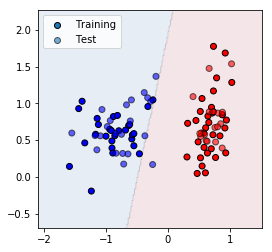

In [57]:
clf = SVC(kernel='linear', C=1)

h=0.02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)

figure, ax = plt.subplots(figsize=(4,4))
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
Zbi = Z > np.median(Z)
ax.contourf(xx, yy, Zbi, cmap=cm, alpha=.1)

# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k', label='Training')
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           edgecolors='k', alpha=0.6, label='Test')

ax.legend()

Luckily, this dataset has two distinct groups, so separating the two with a line is pretty simple. However, that's not always the case. This method would fall apart if there was any overlap. This simple classifier is called the **maximal margin classifier**.

What happens when there is no easy boundary?

In [8]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1, class_sep=0.8)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
data = (X, y)

X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

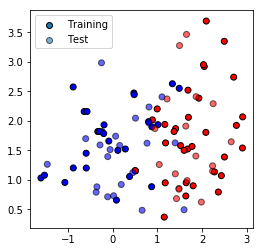

In [9]:
figure, ax = plt.subplots(figsize=(4,4))

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k', label='Training')
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
           edgecolors='k', label='Test')
#ax.set_xlim([-3,4])
#ax.set_ylim([0,4])
ax.legend()

The **maximal margin classifier** can't solve this problem anymore. We're now going to introduce a tuning parameter, **C**. Think of C as the "budget" for the number of violations we will allow to the decision boundary. When C is zero, you won't tolerate any violations: all blues must be on one side of the line, and all reds must be on the other.

In this sense, C, is our **bias/variance tradeoff parameter**. Cool, huh?! Similar to K in K-nearest neighbors. Let's try seeing what happens when we adjust C:

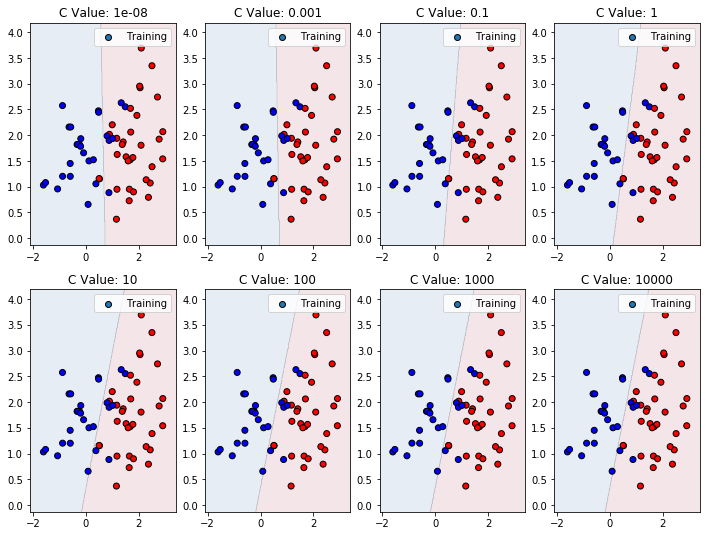

In [17]:
C_values = [0.00000001, 0.001, 0.1, 1, 10, 100, 1000, 10000]
figure, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 9))

axes = [item for sublist in axes for item in sublist]

h=0.02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

for C, ax in zip(C_values, axes):
    clf = SVC(kernel='linear', C=C)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    Zbi = Z > np.median(Z)
    ax.contourf(xx, yy, Zbi, cmap=cm, alpha=.1)

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k', label='Training')
    # Plot the testing points
#     ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
#                edgecolors='k', alpha=0.6, label='Test')

    ax.legend()
    ax.set_title('C Value: {}'.format(str(C)))

But, you might be complaining, this isn't even that exciting! Sure, our predictor works OK-ish. But this is literally just drawing a line. Our KNN predictor did better than this! Is this even a useful method?

**SVMs** really get their power when you take advantage of something called a **kernel**. A kernal takes your original dataset, transoforms it into higher dimensional space, and then draws a hyperplane in that new hyperdimensional space. It's a lot of math that we won't go into here. But let's see what happens when we try to classify some data with a radial kernel.

In [25]:
from sklearn.datasets import make_circles

data = make_circles(noise=0.2, factor=0.5, random_state=1)
X, y = data

X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

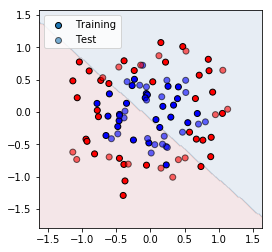

In [26]:
clf = SVC(kernel='linear', C=1)

h=0.02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)

figure, ax = plt.subplots(figsize=(4,4))
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
Zbi = Z > np.median(Z)
ax.contourf(xx, yy, Zbi, cmap=cm, alpha=.1)

# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k', label='Training')
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           edgecolors='k', alpha=0.6, label='Test')

ax.legend()

Yeah, a linear separator isn't going to work here. Let's try a **radial kernel**!

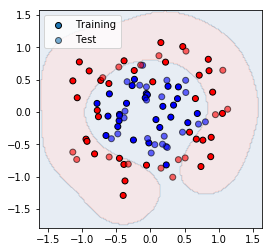

In [39]:
clf = SVC(gamma=4, C=0.1)

h=0.02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)

figure, ax = plt.subplots(figsize=(4,4))
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
Zbi = Z > np.median(Z)
ax.contourf(xx, yy, Zbi, cmap=cm, alpha=.1)

# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k', label='Training')
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           edgecolors='k', alpha=0.6, label='Test')

ax.legend()

There are additional kernels that you can try. If you want to build your SVM skills, try some of these additional exercises:

* Calculate the MSE on the above training and test datasets and compare each of the models.
* Look up the types of kernels available, and try using some alternate kernels.
* Compare the KNN classifier to the linear and radial SVMs